In [ ]:
# This notebook has been run on Google Colab. To run it, uncomment the following lines

# !rm -r Few-shot-learning-with-HuBERT
# !git clone -b dataset-noise --single-branch \
# https://github.com/luckyman94/Few-shot-learning-with-HuBERT.git

# !pip install -U kagglehub

# !rm -r kagglehub_cache/


rm: cannot remove 'Few-shot-learning-with-HuBERT': No such file or directory
Cloning into 'Few-shot-learning-with-HuBERT'...
remote: Enumerating objects: 203, done.
remote: Counting objects: 100% (203/203), done.
remote: Compressing objects: 100% (123/123), done.
remote: Total 203 (delta 80), reused 179 (delta 56), pack-reused 0 (from 0)
Receiving objects: 100% (203/203), 2.32 MiB | 6.43 MiB/s, done.
Resolving deltas: 100% (80/80), done.
rm: cannot remove 'kagglehub_cache/': No such file or directory


In [ ]:

import os
import sys
from pathlib import Path
import torch
from collections import Counter
from tqdm import tqdm

# ---- Hugging Face token ----
# Uncomment the following line if you want to run the notebook on Google Colab. Make sure to replace "YOUR
#os.environ["HF_TOKEN"] = "YOUR TOKEN HERE"

# Uncomment the following lines if you want to run the notebook on Google Colab
#ROOT = Path.cwd() / "Few-shot-learning-with-HuBERT"
#sys.path.append(str(ROOT))

assert "HF_TOKEN" in os.environ
project_root = Path().resolve().parent
sys.path.append(str(project_root))


# ---- Project imports ----
from transformers import HubertModel

from src.datasets.noise_dataset import SyntheticAudioNoiseDataset
from src.methods.fewshot.benchmark import benchmark_fewshot
from src.evaluation.evaluate import evaluate_benchmark

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")


### Low noisy dataset

In [40]:
dataset_clean = SyntheticAudioNoiseDataset(snr_db=30, n_samples=800)

[INFO] SyntheticAudioNoiseDataset | 8 classes | 800 samples | SNR = 30 dB


In [41]:
X = []
y = []

for waveform, label in dataset_clean:
    X.append(waveform)
    y.append(label)

X = torch.stack(X)
y = torch.tensor(y)


print(X.shape)
print(y.shape)


torch.Size([800, 16000])
torch.Size([800])


In [42]:
hubert = HubertModel.from_pretrained("facebook/hubert-base-ls960", use_safetensors=True)
hubert.eval().to(device)

for p in hubert.parameters():
    p.requires_grad = False

Loading weights:   0%|          | 0/211 [00:00<?, ?it/s]

In [45]:
results = {}
for k in [1,5,10]:
    results[k] = benchmark_fewshot(model=hubert, X=X, y=y, device=device, k_shot=k, n_tasks=100)


10-shot benchmark: 100%|██████████| 100/100 [01:50<00:00,  1.10s/it]



===== Few-shot evaluation summary =====

--- 1-shot ---
Accuracy : 0.9949 ± 0.0115
F1 macro : 0.9949


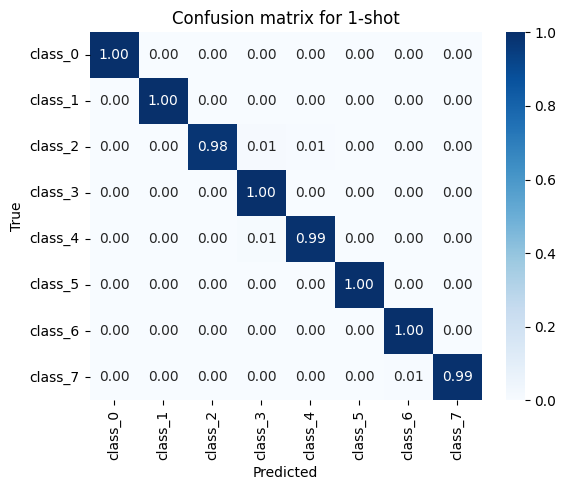


=== Evaluation metrics ===
accuracy    : 0.9949
f1_macro    : 0.9949
precision_macro: 0.9951
recall_macro: 0.9948


/usr/local/lib/python3.12/dist-packages/sklearn/manifold/_t_sne.py:1164: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


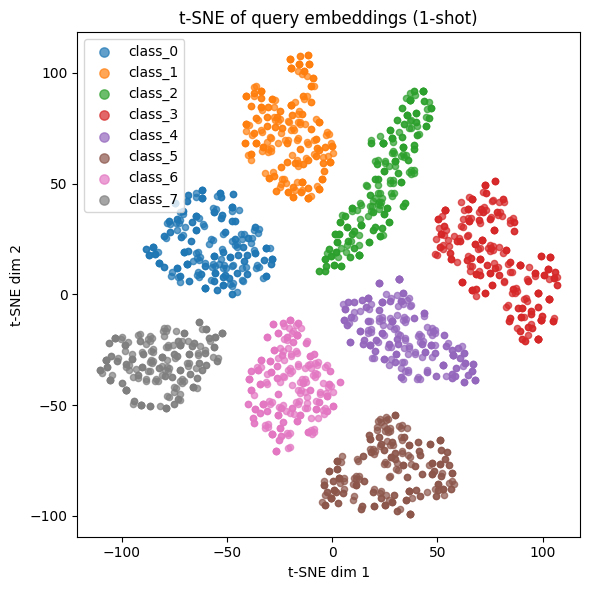


--- 5-shot ---
Accuracy : 0.9970 ± 0.0059
F1 macro : 0.9970


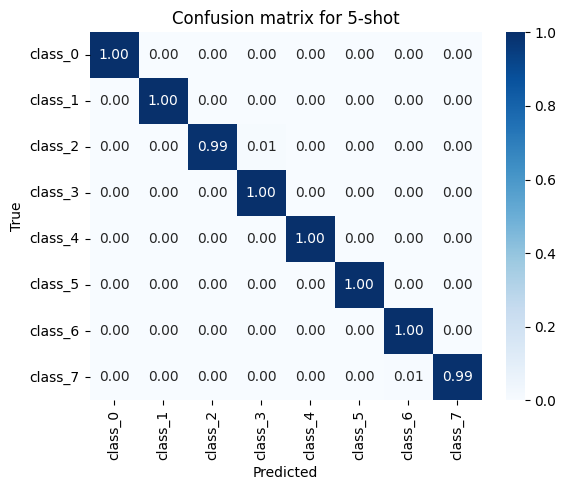


=== Evaluation metrics ===
accuracy    : 0.9970
f1_macro    : 0.9970
precision_macro: 0.9968
recall_macro: 0.9972


/usr/local/lib/python3.12/dist-packages/sklearn/manifold/_t_sne.py:1164: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


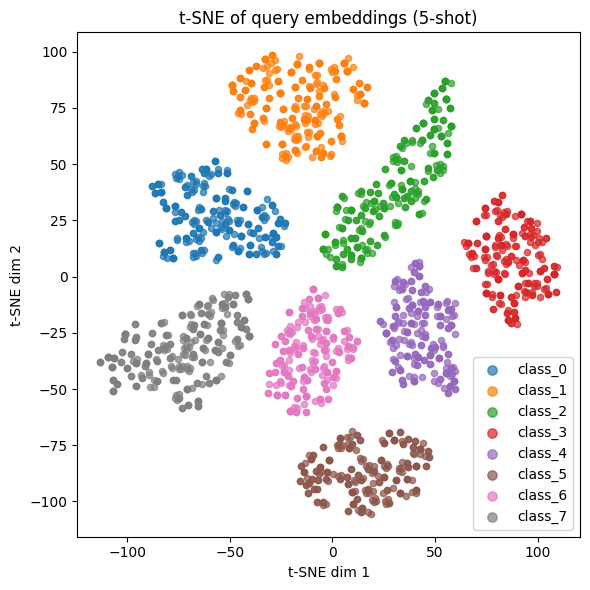


--- 10-shot ---
Accuracy : 0.9990 ± 0.0033
F1 macro : 0.9990


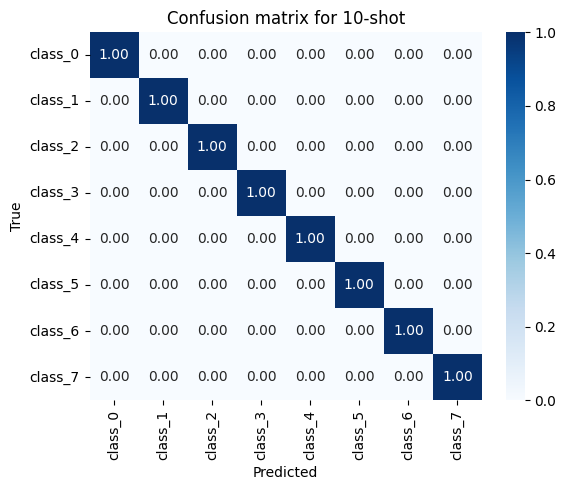


=== Evaluation metrics ===
accuracy    : 0.9990
f1_macro    : 0.9990
precision_macro: 0.9990
recall_macro: 0.9990


/usr/local/lib/python3.12/dist-packages/sklearn/manifold/_t_sne.py:1164: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


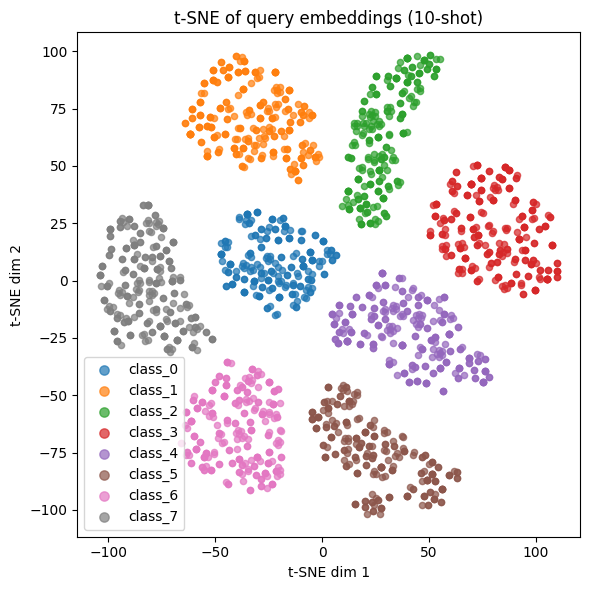

In [46]:
evaluate_benchmark(results, class_names=dataset_clean.classes)

### Moderate noisy dataset

In [47]:
dataset_mid_noisy = SyntheticAudioNoiseDataset(snr_db=10,n_samples=800)

[INFO] SyntheticAudioNoiseDataset | 8 classes | 800 samples | SNR = 10 dB


In [48]:
X = []
y = []

for waveform, label in dataset_mid_noisy:
    X.append(waveform)
    y.append(label)

X = torch.stack(X)
y = torch.tensor(y)


print(X.shape)
print(y.shape)


torch.Size([800, 16000])
torch.Size([800])


In [49]:
hubert = HubertModel.from_pretrained("facebook/hubert-base-ls960", use_safetensors=True)
hubert.eval().to(device)

for p in hubert.parameters():
    p.requires_grad = False

Loading weights:   0%|          | 0/211 [00:00<?, ?it/s]

In [50]:
results = {}
for k in [1,5,10]:
    results[k] = benchmark_fewshot(model=hubert, X=X, y=y, device=device, k_shot=k, n_tasks=100)


10-shot benchmark: 100%|██████████| 100/100 [01:50<00:00,  1.10s/it]



===== Few-shot evaluation summary =====

--- 1-shot ---
Accuracy : 0.9698 ± 0.0349
F1 macro : 0.9696


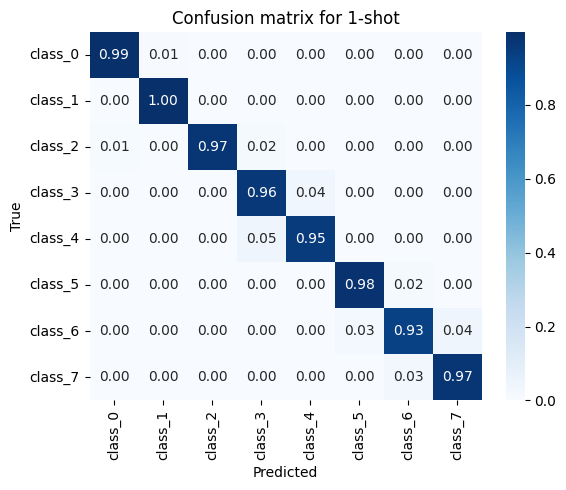


=== Evaluation metrics ===
accuracy    : 0.9698
f1_macro    : 0.9696
precision_macro: 0.9699
recall_macro: 0.9694


/usr/local/lib/python3.12/dist-packages/sklearn/manifold/_t_sne.py:1164: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


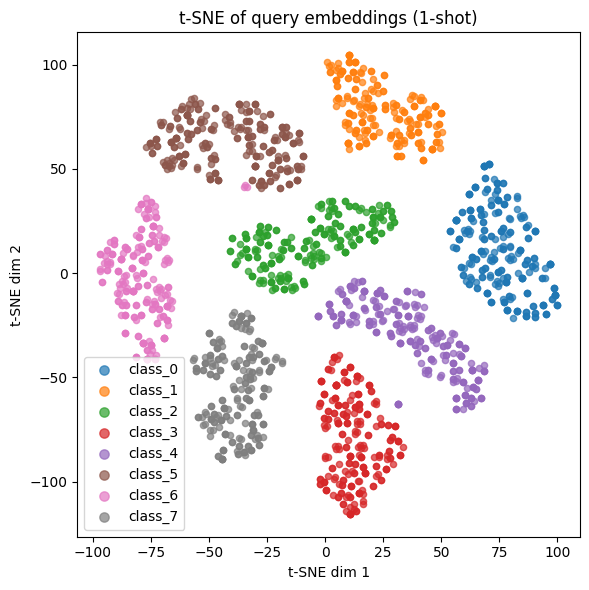


--- 5-shot ---
Accuracy : 0.9836 ± 0.0176
F1 macro : 0.9841


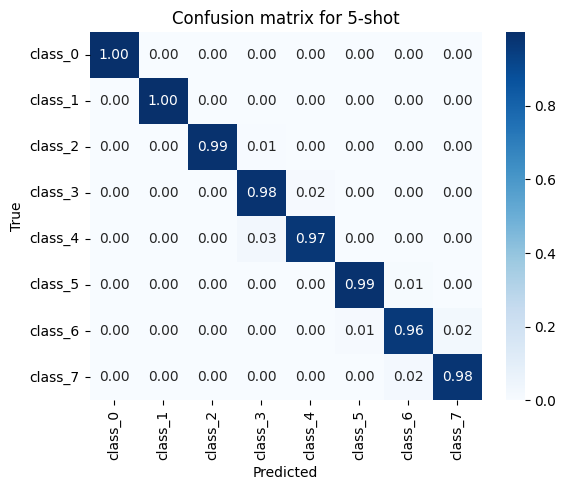


=== Evaluation metrics ===
accuracy    : 0.9836
f1_macro    : 0.9841
precision_macro: 0.9840
recall_macro: 0.9841


/usr/local/lib/python3.12/dist-packages/sklearn/manifold/_t_sne.py:1164: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


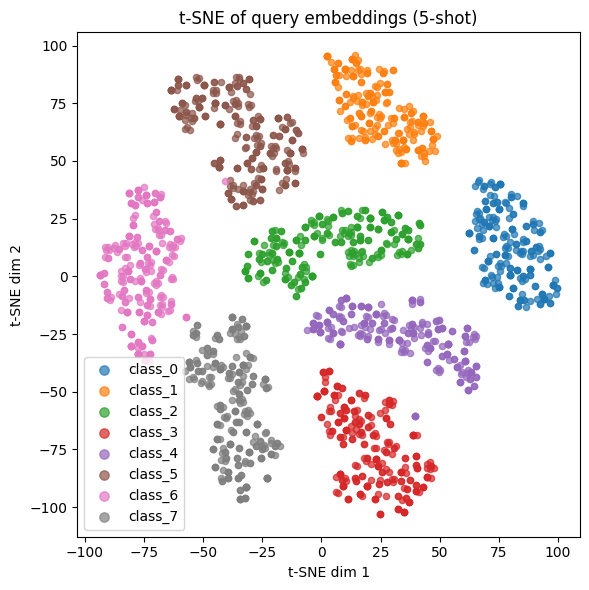


--- 10-shot ---
Accuracy : 0.9847 ± 0.0172
F1 macro : 0.9843


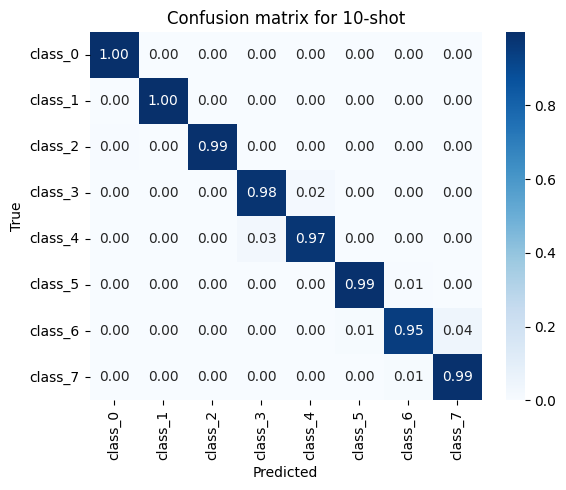


=== Evaluation metrics ===
accuracy    : 0.9847
f1_macro    : 0.9843
precision_macro: 0.9846
recall_macro: 0.9841


/usr/local/lib/python3.12/dist-packages/sklearn/manifold/_t_sne.py:1164: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


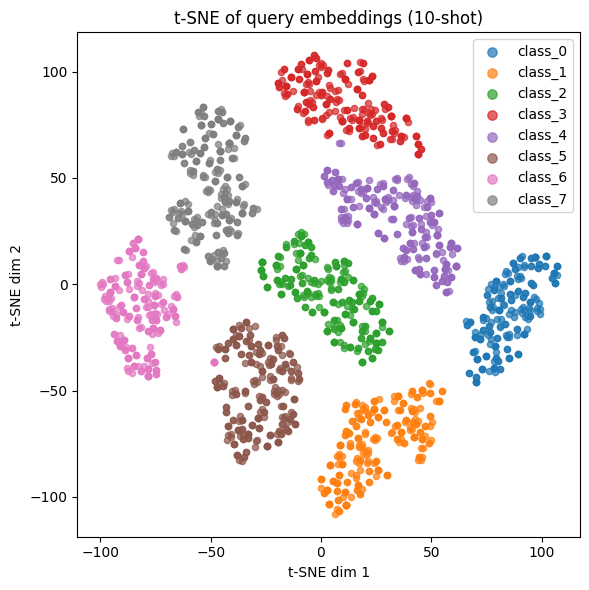

In [51]:
evaluate_benchmark(results, class_names=dataset_mid_noisy.classes)

### Noisy dataset

In [52]:
dataset_noisy = SyntheticAudioNoiseDataset(snr_db=0, n_samples=800)

[INFO] SyntheticAudioNoiseDataset | 8 classes | 800 samples | SNR = 0 dB


In [53]:
X = []
y = []

for waveform, label in dataset_noisy:
    X.append(waveform)
    y.append(label)

X = torch.stack(X)
y = torch.tensor(y)


print(X.shape)
print(y.shape)


torch.Size([800, 16000])
torch.Size([800])


In [54]:
hubert = HubertModel.from_pretrained("facebook/hubert-base-ls960", use_safetensors=True)
hubert.eval().to(device)

for p in hubert.parameters():
    p.requires_grad = False

Loading weights:   0%|          | 0/211 [00:00<?, ?it/s]

In [55]:
results = {}
for k in [1,5,10]:
    results[k] = benchmark_fewshot(model=hubert, X=X, y=y, device=device, k_shot=k, n_tasks=100)


10-shot benchmark: 100%|██████████| 100/100 [01:50<00:00,  1.10s/it]



===== Few-shot evaluation summary =====

--- 1-shot ---
Accuracy : 0.9115 ± 0.0628
F1 macro : 0.9085


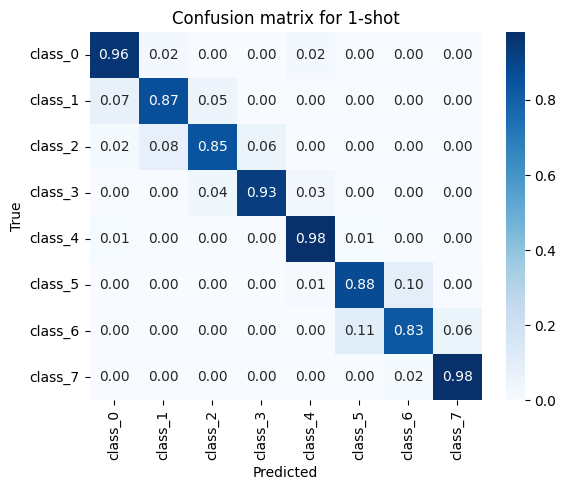


=== Evaluation metrics ===
accuracy    : 0.9115
f1_macro    : 0.9085
precision_macro: 0.9091
recall_macro: 0.9084


/usr/local/lib/python3.12/dist-packages/sklearn/manifold/_t_sne.py:1164: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


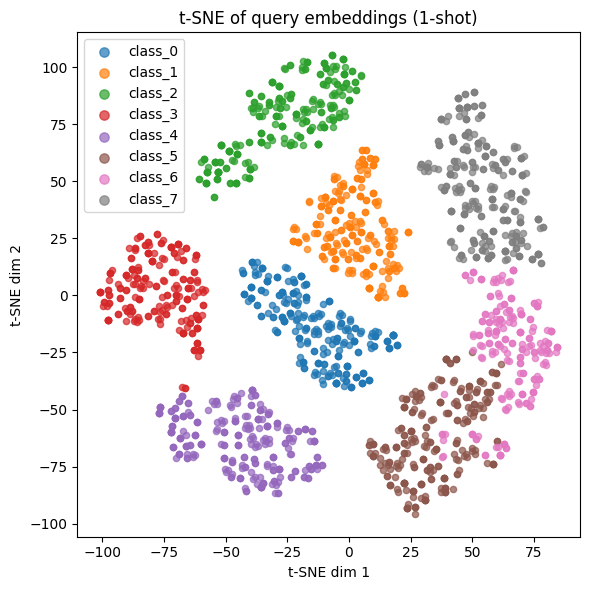


--- 5-shot ---
Accuracy : 0.9553 ± 0.0324
F1 macro : 0.9551


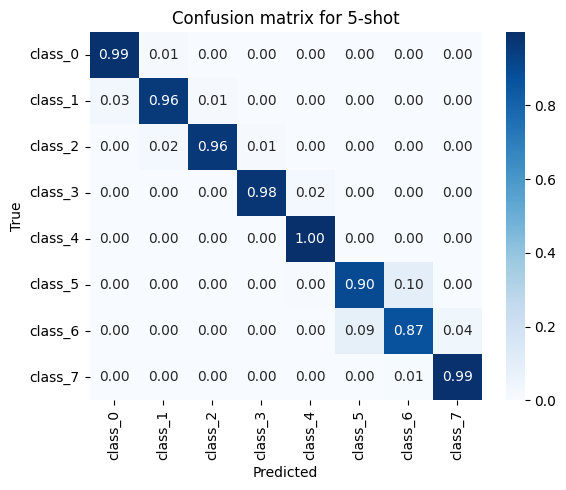


=== Evaluation metrics ===
accuracy    : 0.9553
f1_macro    : 0.9551
precision_macro: 0.9551
recall_macro: 0.9552


/usr/local/lib/python3.12/dist-packages/sklearn/manifold/_t_sne.py:1164: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


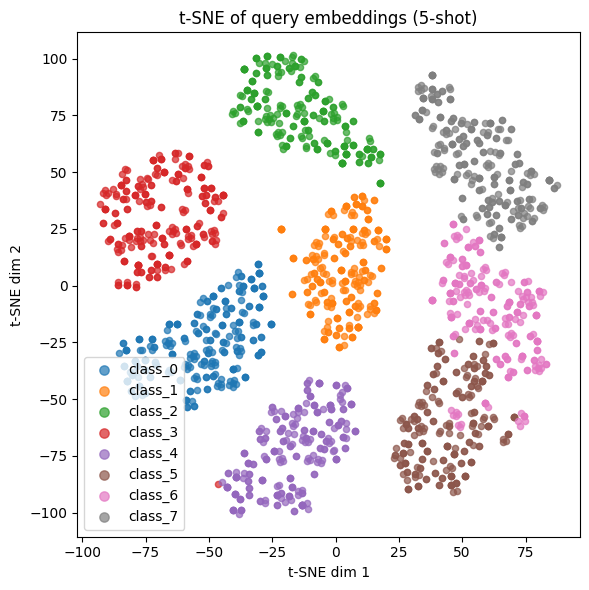


--- 10-shot ---
Accuracy : 0.9624 ± 0.0332
F1 macro : 0.9628


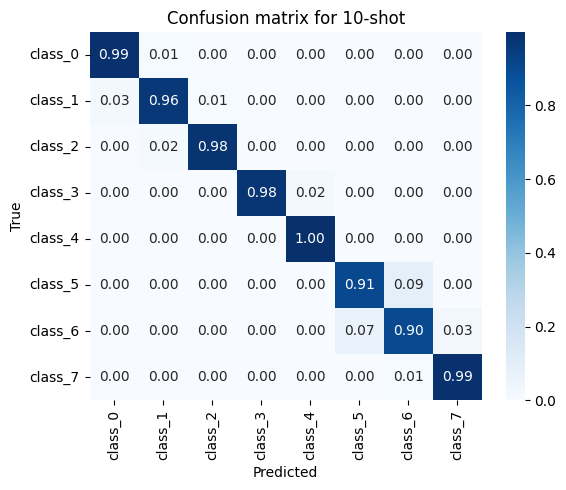


=== Evaluation metrics ===
accuracy    : 0.9624
f1_macro    : 0.9628
precision_macro: 0.9628
recall_macro: 0.9629


/usr/local/lib/python3.12/dist-packages/sklearn/manifold/_t_sne.py:1164: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


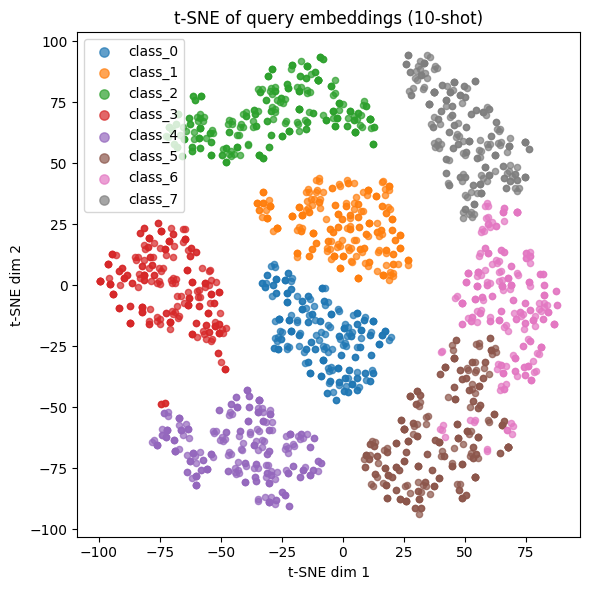

In [56]:
evaluate_benchmark(results, class_names=dataset_noisy.classes)